<a href="https://colab.research.google.com/github/YukiAoki-GU/-Mathematical_analysis_by_Python/blob/main/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主成分分析とは
主成分分析とは，多くの変数(特徴量)を持つデータ分析において，分類の主成分を作成するための統計的分析手法です。その際に重要となるのが，特徴量の項目数を減らす**次元削減**という処理です。

## 次元削減

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris


def pca_use_org(data):
    # ##################### 主成分分析 ########################
    # 共分散行列を求める
    cov_matrix = np.cov(data, rowvar=False)

    # 固有値と固有ベクトルを取得する
    l, v = np.linalg.eig(cov_matrix)

    # 固有値を大きい順に並べる
    l_index = np.argsort(l)[::-1]
    l_ = l[l_index]
    v_ = v[:, l_index]

    # 固有ベクトルを使ってデータを変換する
    data_trans = np.dot(data, v_)

    return data_trans, v_


if __name__ == "__main__":
    # ###################### データ作成 ########################
    # データセットから2次元データを切り出す
    d_index = [0, 2]
    iris = load_iris()
    data = iris.data
    data = data[:, d_index]

    # データ全体の平均を0にする
    print('data=', data)
    data -= data.mean(axis=0)
    print('data=', data)

    # #################### 主成分分析開始 #######################
    # 自作関数(numpyはその限りではない)でPCA
    data_trans, v = pca_use_org(data)

    # ###################### 作図準備 ###########################
    # 変換軸となるベクトルを描画用の変数に格納
    vec_s = [0, 0]
    vec_1st_e = [2*v[0, 0], 2*v[0, 1]]
    vec_2nd_e = [2*v[1, 0], 2*v[1, 1]]

    # ######################## 作図開始 ########################
    # -------------------- 変換前データと変換軸ベクトル ---------
    plt.figure(figsize=[8, 8])
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.quiver(vec_s[0], vec_s[1], vec_1st_e[0], vec_1st_e[1],
               angles='xy', scale_units='xy', scale=1, color='r', label='1st')
    plt.quiver(vec_s[0], vec_s[1], vec_2nd_e[0], vec_2nd_e[1],
               angles='xy', scale_units='xy', scale=1, color='b', label='2nd')
    plt.grid()
    plt.legend()
    plt.scatter(data[:, 0], data[:, 1], c=iris.target)
    #plt.savefig('charts/fig-3.png')

    # -------------- 変換後データ、第1主成分、第2主成分 ---------
    plt.figure(figsize=[8, 8])
    plt.subplot2grid((4, 1), (0, 0), rowspan=2)
    plt.title('1st principal - 2nd principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], data_trans[:, 1], c=iris.target)
    plt.subplot2grid((4, 1), (2, 0))
    plt.tick_params(labelleft="off", left="off")
    plt.title('1st principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], np.zeros(len(data_trans[:, 0])), c=iris.target)
    plt.subplot2grid((4, 1), (3, 0))
    plt.title('2nd principal')
    plt.grid()
    plt.tick_params(labelleft="off", left="off")
    plt.scatter(data_trans[:, 1], np.zeros(len(data_trans[:, 1])), c=iris.target)
    plt.tight_layout()
    plt.show()

---
# アヤメ分類
* setosa(セトーサ)種: ヒオウギアヤメ
* versicolor(バージカラー)種：ブルーフラッグ
* virginica(バージニカ)種：バージニカ


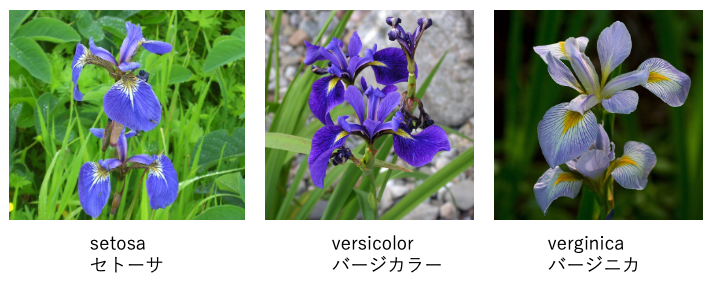

Wikipediaより抜粋

* がく片のながさ: Sepal Length (cm)
* がく片の幅： Sepal Width (cm)
* 花びらの長さ Petal Length (cm)
* 花びらの幅：Petal Width (cm)

で3種類の分類ができるか？

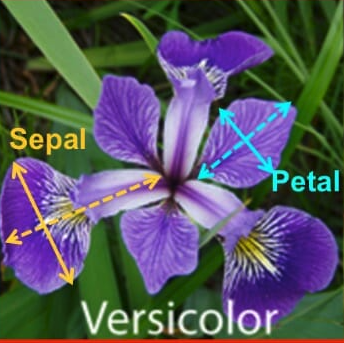

https://rpubs.com/Jay2548/519589
から引用

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print(dir(iris))

| 属性          | 内容                                 |
|---------------|--------------------------------------|
| DESCR         | データセットに関する説明            |
| data          | サンプルごとの特徴量(説明変数)      |
| feature_names | 特徴量の名称                        |
| filename      | ファイル名                          |
| target        | 正解ラベル(目的変数)                |
| target_names  | 正解ラベルの名称                    |

特徴量の名称

In [ ]:
print(iris.feature_names)

特徴量

In [ ]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


アヤメの種類

In [ ]:
print(iris.target_names)

データセットの可視化

In [ ]:
import pandas as pd

# 特徴量のデータフレームを作成
df_feature = pd.DataFrame(iris.data, columns=iris.feature_names)

# 正解ラベルのデータフレームを作成
df_target = pd.DataFrame(iris.target, columns=['species'])

# 正解ラベルが数値なので、分かりやすいように名称に変換
df_target.replace({0: 'setosa', 1: 'versicolor', 2:'virginica' }, inplace=True)

# 特徴量のデータフレームと正解ラベルのデータフレームを連結
# axis=1 と指定することで、列方向に連結する
df_iris = pd.concat([df_feature, df_target], axis=1)

df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df_iris, hue='species', diag_kind='hist')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データ
iris_data = load_iris()
X = iris_data['data']  # 花弁、萼片の長さと幅のリスト
feature_names = iris_data['feature_names']  # 花弁、萼片
target_names = iris_data['target_names']  # 分類するアヤメの種類
y = iris_data['target']  # アヤメの種類を数値ラベルで取得

#データを正規化する
X_scaled = StandardScaler().fit_transform(X)
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
df = pd.DataFrame(pca.components_, columns=feature_names)
pca.explained_variance_ratio_#寄与率


In [ ]:
fig, ax = plt.subplots()

X0 = X_pca[y==0]#三種類に分ける
X1 = X_pca[y==1]
X2 = X_pca[y==2]
ax.scatter(X0[:, 0], X0[:, 1])#第一主成分と第二主成分を用いる
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# アヤメデータセットをロード
iris = load_iris()
X = iris['data']  # 特徴量
y = iris['target']  # クラスラベル
target_names = iris['target_names']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# データを標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCAで次元削減（主成分2次元に削減）
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ロジスティック回帰モデルで分類
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train)

# 予測と正答率の計算
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"正答率: {accuracy:.2f}")

# グラフの表示
plt.figure(figsize=(8, 6))

# テストデータの分類結果をプロット
colors = ['red', 'blue', 'green']
for i, target in enumerate(np.unique(y_test)):
    plt.scatter(X_test_pca[y_test == target, 0], X_test_pca[y_test == target, 1],
                color=colors[i], label=f"True: {target_names[target]}", alpha=0.6, edgecolor='k')

# 予測結果を表示
for i, target in enumerate(np.unique(y_pred)):
    plt.scatter(X_test_pca[y_pred == target, 0], X_test_pca[y_pred == target, 1],
                facecolors='none', edgecolors=colors[i], label=f"Pred: {target_names[target]}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA and Classification Results")
plt.legend()
plt.grid(True)
plt.show()

---
# パーセプトロンで分類

特徴選択：petal lengthとpetal width ([2, 3]) を特徴量として使うことにする。

In [ ]:
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

トレーニングデータとテストデータに分割する。

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

StandardScalerを使って、平均0 分散1となるようにデータをスケーリングする。

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

パーセプトロンと呼ばれるある学習アルゴリズムにより学習

In [ ]:
from sklearn.linear_model import Perceptron

# Perceptronモデルのインスタンス化
ppn = Perceptron(
    max_iter=40,         # 最大反復回数
    tol=1e-3,            # 許容誤差
    eta0=0.1,            # 学習率
    random_state=1234    # 乱数シード
)

# モデルの学習
ppn.fit(X_train_std, y_train)

# モデルのパラメータを確認
print(ppn)

テストデータにおける精度（的中率）を計算する。

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

予測モデルの線形関数を散布図にプロットする。

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
            X_test[:, 1],
            facecolor='none',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

---
# 深層学習(DNN)で分類


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# アヤメデータセットをロード
iris_data = load_iris()
X = iris_data['data'][:, [2, 3]]  # petal length(花びらの長さ) と petal width(花びらの幅) を特徴量として選択
y = iris_data['target']           # クラスラベル

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #データを訓練データ（80%）とテストデータ（20%）に分割

# データを正規化(標準化（平均を0、分散を1にする変換）を行い、モデルが特徴量のスケールに依存しないようにする)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ラベルをワンホットベクトル化
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# モデルの構築
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),  # 隠れ層1， 入力層: 2次元（特徴量2つ）
    Dense(32, activation='relu'),                    # 隠れ層2
    Dense(3, activation='softmax')                  # 出力層（3クラス分類）
])

# モデルのコンパイル
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# モデルの学習
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=16, validation_split=0.2, verbose=1) #訓練データを用いて50エポック学習

# テストデータでモデルの評価。テストデータを用いて損失（test_loss）と正解率（test_accuracy）を評価。
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# テストデータで予測
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 結果を表示
print("True labels:    ", y_test)
print("Predicted labels:", y_pred_classes)

# 散布図をプロット
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

# 正解ラベル
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1],
                color=colors[i], marker=markers[i], label=f"True: {iris_data['target_names'][label]}", alpha=0.6)

# 予測ラベル
for i, label in enumerate(np.unique(y_pred_classes)):
    plt.scatter(X_test[y_pred_classes == label, 0], X_test[y_pred_classes == label, 1],
                facecolors='none', edgecolors=colors[i], marker=markers[i],
                label=f"Pred: {iris_data['target_names'][label]}", alpha=0.9)

plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.title("Iris Classification with DNN")
plt.legend()
plt.grid(True)
plt.show()

---
# ロジスティック回帰による二値分類の例
様々な品種のワインを「良いワイン」と「悪いワイン」に分類したい。\
各ワインは以下の性質に関するデータが与えられている。
1. fixed acidity : 固定酸性度。固定酸度ワインに含まれるほとんどの酸は不揮発性（すぐに蒸発しない）。
2. volatile acidity : 揮発酸濃度。揮発性の酸度ワイン中の酢酸の量は、多すぎると不快な酢の味になる可能性があります。
3. citric acid : クエン酸濃度。クエン酸が少量の場合、ワインに「新鮮さ」と「風味」を加えることができます。
4. residual sugar : 残存糖濃度。残留糖発酵が停止した後に残っている砂糖の量については、1グラム/リットル未満のワインと45グラム/リットルを超えるワインが甘いとみなされるのは稀です。
5. chlorides : 塩化物濃度。
6. free sulfur dioxide : 遊離亜硫酸濃度。微生物の成長とワインの酸化を防ぎます
7. total sulfur dioxide : 総二酸化硫黄濃度。低濃度では、二酸化硫黄はワインではほとんど検出されませんが、50 ppmを超える遊離二酸化硫黄濃度では、ワインの香りや味に二酸化硫黄がはっきりと現れます。
8. density : 密度。水の密度は、アルコールと糖分の割合によって、水の密度に近くなります。
9. pH : pH。ほとんどのワインはpHが3-4の間です。
10. sulphates : 硫酸塩濃度。抗菌剤および酸化防止剤として寄与することができるワイン添加物
11. alcohol : アルコール度数
12. quality (score between 0 and 10) : ソムリエが判定した0-10 の値で示される品質のスコア

このうち1〜11は装置を用いて測定可能であり、12は人間のソムリエが判定した値である。\
「良いワイン」=項目12が6以上\
「悪いワイン」=項目12が6未満 \
### ソムリエが判定した項目12は項目1〜11から判別できるのか？どの特性がワインを良くするのか？

以下の赤ワインのデータを用いて判別しよう。\
https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt


In [ ]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# URL によるリソースへのアクセスを提供するライブラリ
import urllib.request

# 図やグラフを図示するためのライブラリをインポートする。
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import plotting

# 機械学習関連のライブラリ群
from sklearn.model_selection import train_test_split # 訓練データとテストデータに分割
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # 線形判別分析
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as QDA # 二次判別分析

---

In [ ]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'winequality-red.txt') # Python 3 の場合

In [ ]:
# データの読み込み
df1 = pd.read_csv('winequality-red.txt', sep='\t', index_col=0)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


---
### Pandasの簡単な使い方

In [ ]:
# 簡単な例

toy_data = pd.DataFrame([[1,4,7,10,13,16],[2,5,8,11,14,27],[3,6,9,12,15,17],[21,24,27,20,23,26]],
                   index = ['i1','i2','i3', 'i4'],
                   columns = list("abcdef"))

In [ ]:
toy_data # 中身の確認

,a,b,c,d,e,f
i1,1,4,7,10,13,16
i2,2,5,8,11,14,27
i3,3,6,9,12,15,17
i4,21,24,27,20,23,26


In [ ]:
# F列の値が 20 未満の列だけを抜き出す
toy_data[toy_data['f'] < 20]

,a,b,c,d,e,f
i1,1,4,7,10,13,16
i3,3,6,9,12,15,17


In [ ]:
# F列の値が 20 以上の列だけを抜き出す
toy_data[toy_data['f'] >= 20]

,a,b,c,d,e,f
i2,2,5,8,11,14,27
i4,21,24,27,20,23,26


In [ ]:
# F列の値が 20 以上の列だけを抜き出して、そのB列を得る
pd.DataFrame(toy_data[toy_data['f'] >= 20]['b'])

,b
i2,5
i4,24


In [ ]:
# classという名の列を作り、F列の値が 20 未満なら 0 を、そうでなければ 1 を入れる
toy_data['class'] = [0 if i < 20 else 1 for i in toy_data['f'].tolist()]

In [ ]:
toy_data # 中身を確認

,a,b,c,d,e,f,class
i1,1,4,7,10,13,16,0
i2,2,5,8,11,14,27,1
i3,3,6,9,12,15,17,0
i4,21,24,27,20,23,26,1


---

## 練習問題
qualityが6未満の行を抜き出して`bad_quality`としなさい。

## 練習問題
qualityが6以上の行を抜き出して`good_quality`としなさい。

In [ ]:
fig, ax = plt.subplots(1, 1)

# quality が 6 未満の行を抜き出して、x軸を volatile acidity 、 y軸を alcohol として青色の丸を散布する
bad_quality.plot(kind='scatter', x=u'volatile acidity', y=u'alcohol', ax=ax,
                              c='blue', alpha=0.5)

# quality が 6 以上の行を抜き出して、x軸を volatile acidity 、 y軸を alcohol として赤色の丸を散布する
good_quality.plot(kind='scatter', x=u'volatile acidity', y=u'alcohol', ax=ax,
                              c='red', alpha=0.5, grid=True, figsize=(5,5))
plt.show()

In [ ]:
# quality が 6 未満のものを青色、6以上のものを赤色に彩色して volatile acidity の分布を描画
bad_quality['volatile acidity'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='blue')
good_quality['volatile acidity'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='red')

In [ ]:
# 同様に、qualityが６未満のワインと６以上のワインでは pH の分布が異なるか調べてみましょう。
# quality が 6 未満のものを青色、6以上のものを赤色に彩色して pH の分布を描画
bad_quality['pH'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='blue')
good_quality['pH'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='red')


## 練習問題
qualityが6未満のワインを「0」，6以上のワインを「1」としたclass列を追加しなさい。

In [ ]:
# class 列が 0 なら青色、1 なら赤色に彩色して散布図行列をかく
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df1['class'].tolist()]

pd.plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:11]], figsize=(20, 20), color=colors, alpha=0.5)
plt.show()

上図から、各変数と、quality の良し悪しとの関係がボンヤリとつかめてきたのではないでしょうか。続いて主成分分析をしてみます。主成分分析とは、多くの変数の値を、1個または少数個の総合的指標（主成分）に代表させようという手法です。これにより、多くの変数を持つデータを、少ない次元で表すことができ、変数や観測値の分類なども可能になります。

In [ ]:
dfs = df1.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0) # データの正規化

pca = PCA()
pca.fit(dfs.iloc[:, :11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :11])
#plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

### 説明変数と目的変数に分ける
ここまでで、ワインの品質を２群に分けました。次は、目的変数（ここでは、品質）と説明変数（それ以外の変数）に分けましょう。

In [ ]:
X = dfs.iloc[:, :11] # 説明変数
y = df1.iloc[:, 12] # 目的変数
X # 説明変数を出力

In [ ]:
pd.DataFrame(y).T # 目的変数を確認。縦に長いと見にくいので転置して表示。

### 訓練データとテストデータに分ける
機械学習ではその性能評価をするために、既知データを訓練データ（教師データ、教師セットともいいます）とテストデータ（テストセットともいいます）に分割します。訓練データを用いて訓練（学習）して予測モデルを構築し、その予測モデル構築に用いなかったテストデータをどのくらい正しく予測できるかということで性能評価を行ないます。そのような評価方法を「交差検定」(cross-validation)と呼びます。ここでは、

訓練データ（全データの６０％）\
X_train : 訓練データの説明変数\
y_train : 訓練データの目的変数\
テストデータ（全データの４０％）\
X_test : テストデータの説明変数\
y_test : テストデータの目的変数\
とし、X_train と y_train の関係を学習して X_test から y_test を予測することを目指します。

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータへのランダムな分割
X_train.head() # 先頭５行を表示して確認

In [ ]:
pd.DataFrame(y_train).T # 縦に長いと見にくいので転置して表示。

### ロジスティック回帰
機械学習モデルとして有名なものの一つとして、ロジスティック回帰があります。線形回帰分析が量的変数を予測するのに対して、ロジスティック回帰分析は発生確率を予測する手法です。基本的な考え方は線形回帰分析と同じなのですが、予測結果が 0 から 1 の間を取るように、数式やその前提に改良が加えられています。

In [ ]:
clf = LogisticRegression() #モデルの生成
clf.fit(X_train, y_train) #学習

In [ ]:
# 正解率 (train) : 学習に用いたデータをどのくらい正しく予測できるか
clf.score(X_train,y_train)

正解率の数字を出すだけなら以上でおしまいですが、具体的な予測結果を確認したい場合は次のようにします。

In [ ]:
y_predict = clf.predict(X_test)
pd.DataFrame(y_predict).T

In [ ]:
# 予測結果と、正解（本当の答え）がどのくらい合っていたかを表す混合行列
pd.DataFrame(confusion_matrix(y_predict, y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

# 課題
以下の白ワインのデータで分類しなさい。\
https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt